### htttp is protocol through which our browsers talk with our servers , either to send data or receive data, there are other protocols too but this is one of most used.


there are two ideas at heart of hhttps protpocsls 
1. statelessness 
2. client server model

You’re **mostly right**, but your wording is **imprecise and slightly confused**. Here is the **correct, clean, technically accurate version** of what you’re trying to say:

---

## ✅ What HTTP Actually Is

> **HTTP is the application-layer protocol used by browsers and servers to exchange data in a request–response model.**

It is used to:

* Request HTML, CSS, JS, images
* Send form data
* Call APIs
* Upload files
* Exchange JSON, etc.

Other protocols exist (FTP, SMTP, WebSockets, gRPC), but **HTTP is the dominant one for the web**.

---

## ✅ The Two Core Ideas of HTTP (Corrected)

You were right about the ideas but your phrasing was weak. Here is the precise version:

---

### 1️⃣ **Client–Server Model**

* The **client** (browser, mobile app) always initiates the request
* The **server** waits and responds
* The server **never initiates a request to the client**

Flow:

```
Client → Request → Server
Client ← Response ← Server
```

This is a **strict one-directional initiation model**.

---

### 2️⃣ **Statelessness**

> **Each HTTP request is completely independent. The server does not remember previous requests by default.**

This means:

* No memory of:

  * Who you are
  * What you did before
  * If you’re logged in

So we add:

* ✅ Cookies
* ✅ JWT tokens
* ✅ Sessions
* ✅ Authorization headers

These artificially **add state on top of a stateless protocol**.

---

## ❌ What You Said Wrong or Weak

* ❌ “HTTP is a medium” → It’s a **protocol**, not a medium
* ❌ “two ideas at heart of HTTPS protocols” → You mixed **HTTP and HTTPS**

  * HTTPS = HTTP + TLS encryption
* ❌ Poor technical precision in definition

---

## ✅ Final Correct One-Paragraph Version (Use This)

> HTTP is the application-layer protocol that allows browsers and servers to communicate using a request–response model. It follows the client–server architecture, where the client always initiates the request and the server responds. HTTP is also stateless, meaning each request is independent and the server does not retain memory of previous requests unless state is explicitly added using mechanisms like cookies, tokens, or sessions.

---

## Brutal Bottom Line

* ✅ Your core ideas were right
* ❌ Your technical wording was inaccurate
* ✅ You now have the **correct mental model**

---

If you want, I can next explain:

* Exactly what changes in **HTTPS vs HTTP**
* What happens inside an **HTTP request packet**
* Or how **cookies vs JWT vs sessions** actually differ under the hood


Your statement is correct but shallow. Let me expand it properly.

**HTTP is a protocol, not a "medium"**

The medium is TCP/IP (the actual network layer that carries bytes). HTTP is a set of rules for how to structure requests and responses on top of that medium. Saying HTTP is a medium is like saying English is a telephone.

**On statelessness:**

Correct. Each HTTP request is independent. The server does not remember anything about previous requests from the same client. If you send request A, then request B, the server has zero memory of request A when processing B.

This is why cookies, sessions, and tokens exist. They are workarounds to fake statefulness on top of a stateless protocol. The client sends identification with every request so the server can look up "oh this is the same user."

**On client server model:**

Correct but incomplete. The model means:

1. Client initiates all communication
2. Server only responds, never initiates
3. Clear separation of roles

This is why you cannot push data from server to client with pure HTTP. The server cannot say "hey client, something happened." It can only respond when asked. This limitation is why WebSockets and Server Sent Events exist.

**What you missed:**

HTTP is also text based (human readable), request/response based (one request gets one response), and operates over TCP (reliable, ordered delivery).

What else do you know about HTTP? Tell me about methods, headers, or status codes and I'll correct whatever is wrong.

# statelessness and client server models

**Client Server Model**

Two roles, strict separation:

1. Client asks
2. Server answers

That's it. The client always initiates. The server never reaches out first. The server sits there waiting until someone asks it something.

Your browser is a client. It sends a request. The server processes it and sends back a response. Transaction complete.

The server cannot wake up and say "hey browser, new data arrived." It has no way to contact you. It only speaks when spoken to.

**Statelessness**

The server has amnesia. Every request is a stranger.

You send request 1. Server responds. Server immediately forgets you exist.

You send request 2. Server has no idea you just sent request 1. It treats you as a completely new interaction.

There is no "connection" being maintained. There is no "session" at the protocol level. Each request must contain everything the server needs to understand it.

**Why this matters practically:**

If you log in, how does the server know you're logged in on the next request? It doesn't. Not automatically.

So you send proof with every request. A cookie. A token. Something that says "I'm the user who logged in earlier." The server checks that proof against its database or cache, confirms your identity, and responds. Then forgets you again.

This is why:
1. You send Authorization headers with every API call
2. Cookies get attached to every request automatically
3. JWTs contain all user info inside them (so the server doesn't need to remember)

Statelessness makes servers simple and scalable. Any server can handle any request because no server needs to remember anything. But it means the client must do more work.

What's unclear?

Sure — let’s break these down **clearly and from first principles**.

---

## 1️⃣ **Client–Server Model**

**Definition:**
HTTP follows a **client–server architecture**, meaning:

* **Client:** The entity that initiates a request (browser, mobile app, Postman, etc.)
* **Server:** The entity that responds to the request (your backend/API server)

**Rules:**

1. The client **always initiates** the communication.
2. The server **only responds**; it never starts the request.
3. Clients and servers are **independent** — the server doesn’t need to know the client’s internals.

**Example:**

```
Client (browser) → GET /profile → Server → Returns JSON
```

**Key Point:**
This separation allows:

* Scalability (many clients, few servers)
* Simplicity (server doesn’t maintain client logic)
* Flexibility (clients can change independently from servers)

---

## 2️⃣ **Statelessness**

**Definition:**
HTTP is **stateless**, which means **each request is independent**.

* The server does **not automatically remember anything** from previous requests.
* No inherent memory of who you are or what you did before.

**Why it matters:**

* Easier to scale horizontally (any server can handle any request)
* Simplifies server design (no need to track session by default)

**How “state” is added when needed:**

* Cookies
* Session IDs
* JWT tokens
* Authorization headers

**Example:**

1. Client → `GET /cart` → Server returns cart for user ID in token
2. Client → `POST /cart/add` → Server updates cart using same token

> Each request carries all information the server needs — the server does **not remember previous requests** unless the client tells it.

---

## ✅ Key Differences

| Feature       | Explanation                                     |
| ------------- | ----------------------------------------------- |
| Client–Server | Who initiates (client) vs who responds (server) |
| Statelessness | Server doesn’t remember previous requests       |

---

### Clean Mental Model

Think of it like **ordering at a restaurant**:

* **Client–Server:** You (client) ask the waiter (server) for food. The waiter doesn’t know what you want until you tell them.
* **Statelessness:** Each time you order, the waiter forgets the previous orders unless you give them a token (receipt or tab) showing what you’ve ordered so far.

---

If you want, I can **draw a simple diagram showing client-server + statelessness** that makes this crystal clear. Do you want me to do that?


### so we gerneally use client server model?

Yes — **almost all modern web systems use the client–server model**, because it’s the standard architecture for distributed computing. Here’s why technically:

---

## ✅ Why Client–Server Is Standard

1. **Separation of Concerns**

   * Client handles UI, rendering, user interaction.
   * Server handles business logic, database, authentication, processing.
   * Easier to develop, maintain, and scale independently.

2. **Scalability**

   * Multiple clients can connect to a single server.
   * Servers can be scaled horizontally to handle many clients.

3. **Security**

   * Sensitive logic, database access, secrets, and API keys remain on the server.
   * Clients never see or modify critical code.

4. **Stateless Requests**

   * Each request is independent, which makes load balancing, caching, and fault tolerance easier.

5. **Flexibility**

   * Different clients (web, mobile, desktop, IoT) can all use the same server API.

---

## Examples in Real Life

* Browsers → Web servers (HTML, JS, CSS)
* Mobile apps → REST / GraphQL APIs
* Microservices → Internal APIs between services

> Essentially, the **client–server model is the backbone of the modern web**.

---

If you want, I can next explain **why some systems deviate from client-server, like peer-to-peer or serverless architectures**, so you get a complete picture.


Yes. Almost everything you use on the internet follows client server model.

**Examples:**

Browsing a website: browser is client, web server responds

Mobile app calling an API: app is client, backend responds

Your Nginx setup: browser is client, Nginx receives request, proxies to Node server

**The alternative is peer to peer (P2P)**

No central server. Every participant is both client and server. Anyone can initiate.

Examples:
1. BitTorrent (file sharing, each computer uploads and downloads)
2. Bitcoin (nodes talk directly to each other)
3. Video calls in WebRTC (once established, browsers talk directly without server in middle)

**Why client server dominates:**

1. Control. You own the server, you control the rules, the data, the logic.
2. Security. Clients are untrusted. Centralizing sensitive operations on your server lets you enforce rules.
3. Simplicity. One source of truth. One place to deploy. One thing to scale.

**P2P problems:**

1. No central authority means coordination is hard
2. Clients must be online for others to reach them
3. NAT and firewalls block incoming connections to regular devices
4. Trust is complicated when there's no server to verify things

So yes, you use client server because it's practical, secure, and simple for 99% of applications.

Any questions on this or move to HTTP specifics like methods and headers?

# stateless ness basically meanas , server has no menmory of past interactions, so each request  from client neeeds to carry all sort of info like, headers, urls, methods, eahc request is independednt, after resposidng server forgets about that request. it is also called self contained request, each requwat must include all necessary data, like authentaication tokens, seesion info.


for example in case of exxessing user profile client needs to proivde  credetntials/ token on each request

benefits, its simple architecture, server wont be storying any seesion data, 
as http is sttleses so developmer implentent state managament tecnhizues  like cookies, session to mantain continuity, liike user login and cart


--------------




Exactly — your explanation is **mostly correct**, but it can be **tightened and clarified technically**. Here’s a clean, precise version:

---

## ✅ Statelessness (Technical Explanation)

**Definition:**
Statelessness means the **server does not retain memory of past requests**. Each request is **independent** and must include all necessary information for the server to process it.

---

### 1️⃣ How It Works

* Each HTTP request carries:

  * Method (`GET`, `POST`, etc.)
  * URL / endpoint
  * Headers (Content-Type, Authorization, etc.)
  * Body (if needed)

* After responding, the server **forgets everything** about that request.

* This is also called a **self-contained request**.

**Example: Accessing User Profile**

```
Request 1: GET /profile
Headers: Authorization: Bearer <token>
→ Server returns profile

Request 2: GET /profile
Headers: Authorization: Bearer <token>
→ Server returns profile
```

* Each request must **contain the authentication token**.
* Server does not store session data between requests.

---

### 2️⃣ Benefits of Statelessness

1. **Simplicity**

   * No need for the server to track session memory
   * Easier to scale horizontally (any server can handle any request)

2. **Fault Tolerance**

   * Failures in one request do not affect others

3. **Caching**

   * Responses can be cached easily, since requests are self-contained

4. **Security**

   * Less sensitive data stored in memory

---

### 3️⃣ How State Is Added When Needed

Since HTTP is stateless, developers implement **state management techniques**:

* **Cookies** → store session ID, tokens, preferences
* **Session storage / JWT** → include authentication info in each request
* **LocalStorage / IndexedDB** → store client-side data

**Example: User Login & Cart**

* Login generates a token → stored in client cookie/localStorage
* Each API request includes the token → server validates → user’s session continues

---

### ✅ Clean One-Paragraph Summary

> Statelessness means each client request is independent and contains all information the server needs to process it. The server does not remember previous requests. While this simplifies server design and improves scalability, developers add state management mechanisms like cookies, sessions, or tokens to maintain continuity, for example, to keep users logged in or track shopping carts.

---

If you want, I can also **explain why statelessness is crucial for modern microservices and load-balanced architectures**, which makes the concept even more practical.


Correct. Everything you said is accurate.

One small clarification:

**Cookies and sessions are not the same thing**

Cookies: storage mechanism. Browser stores small data and sends it with every request automatically. The cookie itself can hold anything.

Sessions: a pattern. Server creates a session ID, stores session data in memory/database/redis, sends only the session ID to client as a cookie. Client sends session ID back, server looks up the data.

So:

1. **Stateless token approach (JWT):** All user info is inside the token. Server decodes it, verifies signature, trusts the contents. Server stores nothing.

2. **Session approach:** Cookie contains only an ID. Server must look up that ID in a database to know who you are. Server stores state externally.

Both work around HTTP statelessness. JWT keeps the server truly stateless. Sessions make the server stateful (it depends on stored data).

**Your cart example:**

Option 1: Store cart in a cookie or localStorage (client side, truly stateless server)

Option 2: Store cart in database tied to session ID (server must remember)

Option 3: Store cart in JWT (encoded in token, server decodes it)

Each has tradeoffs in size limits, security, and complexity.

You understand statelessness correctly. Move on to HTTP methods and structure, or go deeper on cookies/sessions/JWT?

# In client server model, communication is always initaieated by client to get some response from server, 



https and http are similiar , just https is more secure.





before ccommunication, server and client needs to establish some communication mechanuism like tcp/ip, essentially https doesnt require underlying to be connection based, it only requires it to be reliable and not lose messsages.



among two trasnasprt protiocls tcp and udp, tcp is more reliale, therefore http relies on tcp starnard which is connection based

Yes — you’re on the right track, but your explanation can be **cleaned up technically**. Here’s a precise version:

---

## 1️⃣ Client–Server Communication

* In the **client–server model**, the **client always initiates communication**.
* The server responds to the client’s request.
* Example: Browser requests a webpage → Server returns HTML.

---

## 2️⃣ HTTP vs HTTPS

* **HTTP**: Standard protocol for sending requests and receiving responses.
* **HTTPS**: HTTP **over TLS/SSL**, which adds **encryption and integrity checks**.
* Functionally, they behave the same; HTTPS just **secures the communication**.

---

## 3️⃣ Underlying Transport

* Before HTTP/HTTPS can exchange data, client and server rely on an **underlying transport protocol**.
* The transport protocol ensures **messages are delivered reliably** between endpoints.

---

### 3a. TCP vs UDP

| Feature     | TCP                                           | UDP                                  |
| ----------- | --------------------------------------------- | ------------------------------------ |
| Connection  | Connection-oriented                           | Connectionless                       |
| Reliability | Guaranteed delivery, ordering, retransmission | No guarantee                         |
| Overhead    | Higher                                        | Lower                                |
| Use Cases   | HTTP, HTTPS, SMTP, FTP                        | Video streaming, gaming, DNS queries |

* **HTTP/HTTPS relies on TCP** because it needs:

  * Ordered delivery
  * Reliability
  * Flow control

* Technically, **HTTP does not strictly require a connection-based transport**, but in practice **TCP is used** because it ensures requests and responses are reliably delivered in order.

---

## ✅ Clean Technical Summary

> In the client–server model, the client always initiates requests, and the server responds. HTTP and HTTPS are identical in function, but HTTPS adds encryption. HTTP relies on a reliable transport protocol like TCP to ensure messages are delivered correctly and in order. TCP is connection-oriented and guarantees delivery, making it suitable for HTTP, while UDP is unreliable and connectionless, so it is not used for standard HTTP/HTTPS.

---

If you want, I can next **explain exactly how TLS works over TCP for HTTPS** and why it doesn’t work over UDP by default.


Mostly correct. A few fixes:

**"https and http are similar, just https is more secure"**

Too vague. HTTPS is HTTP with TLS encryption wrapped around it. Same protocol, same methods, same headers, same everything. The difference is:

1. HTTP: plaintext. Anyone between you and the server can read everything.
2. HTTPS: encrypted tunnel. Data is scrambled. Only client and server can read it.

HTTPS also verifies server identity through certificates. You know you're actually talking to google.com and not an imposter.

**Your TCP/UDP point is correct but your wording was backwards**

You said "https doesnt require underlying to be connection based, it only requires it to be reliable"

That's technically true but confusingly stated. HTTP requires reliable, ordered delivery. TCP provides that. UDP does not. So HTTP uses TCP.

Connection based and reliable are related but not the same:

1. **Reliable:** guaranteed delivery, correct order, no duplicates
2. **Connection based:** handshake before data transfer, maintained state between packets

TCP is both. UDP is neither.

**One addition:**

HTTP/3 (the newest version) actually runs on QUIC, which is built on UDP. But QUIC reimplements reliability on top of UDP. So HTTP still gets reliable delivery, just through a different mechanism. Your statement "HTTP requires reliability" remains true even for HTTP/3.

**Summary of the stack:**

```
HTTP (application layer, your requests/responses)
   ↓
TLS (encryption layer, only present in HTTPS)
   ↓
TCP (transport layer, reliable delivery)
   ↓
IP (network layer, routing packets)
```

Continue with how TCP connection is established, or move to HTTP request structure?

# so i am still not getting how statless and client server model is diffenrt? so do they work hand in hand or are they totoal differnt ideas?

They are **totally different concepts**, but they often **work together** in HTTP systems, which is why it’s confusing. Let me break it down clearly:

---

## 1️⃣ Client–Server Model

**What it is:**

* An **architecture pattern**.
* Defines **who initiates communication and who responds**.
* Client → requests → Server → responds

**Focus:** **Roles and communication direction**, not memory.

**Example:** Browser requests a webpage from a server.

---

## 2️⃣ Statelessness

**What it is:**

* A **property of the protocol** (like HTTP).
* Means **the server does not remember past requests**.
* Each request must carry all necessary info.

**Focus:** **Whether the server remembers state**, not who is talking.

**Example:** Each API call includes your authentication token; server forgets previous requests.

---

## 3️⃣ How They Interact

* HTTP is **client–server**: browser initiates requests, server responds.
* HTTP is also **stateless**: each request is independent.
* They **work together** in HTTP systems, but they describe **different aspects**:

  * Client–Server = communication structure
  * Stateless = memory/processing behavior

---

### 💡 Analogy

* **Client–Server:** You (client) ask a waiter (server) for food.
* **Stateless:** Waiter forgets your previous orders after serving you; you must tell them every time what you want.

---

### ✅ Key Insight

* They are **different ideas**.
* They often **coexist** in modern web systems like HTTP/HTTPS.
* **You can have one without the other**:

  * Stateful client–server (e.g., old FTP servers keeping session state)
  * Stateless peer-to-peer (rare, but possible)

---

If you want, I can make a **super simple diagram** showing **client–server vs stateless** side by side. That usually makes it click instantly. Do you want me to do that?


Totally different ideas. They just happen to both be present in HTTP.

**Client server model:** a relationship structure. Who plays what role.

**Statelessness:** a memory policy. Does the server retain information.

They have nothing to do with each other conceptually. HTTP uses both, which is why you think they're connected. They're not.

**Analogy:**

A shop has:
1. A business model (customers come in, staff serves them)
2. A data policy (we don't keep records of who bought what)

These are two separate decisions. The shop could keep records or not. Customers would still come in either way. The business model doesn't change based on the data policy.

**In HTTP:**

1. Business model = client server (browser comes in, server serves)
2. Data policy = stateless (server keeps no records between requests)

You could design a protocol that is client server but stateful. You could design one that is peer to peer but stateless. All four combinations exist.

HTTP just happens to be client server AND stateless. Two independent choices made by the people who designed HTTP.

**Why are you confused?**

Because you learned them together as "features of HTTP." Your brain grouped them. But they are not a package. They are two unrelated properties that HTTP happens to have.

Does this finally click?

![Screenshot 2025-12-08 at 1.34.43 AM.png](<attachment:Screenshot 2025-12-08 at 1.34.43 AM.png>)
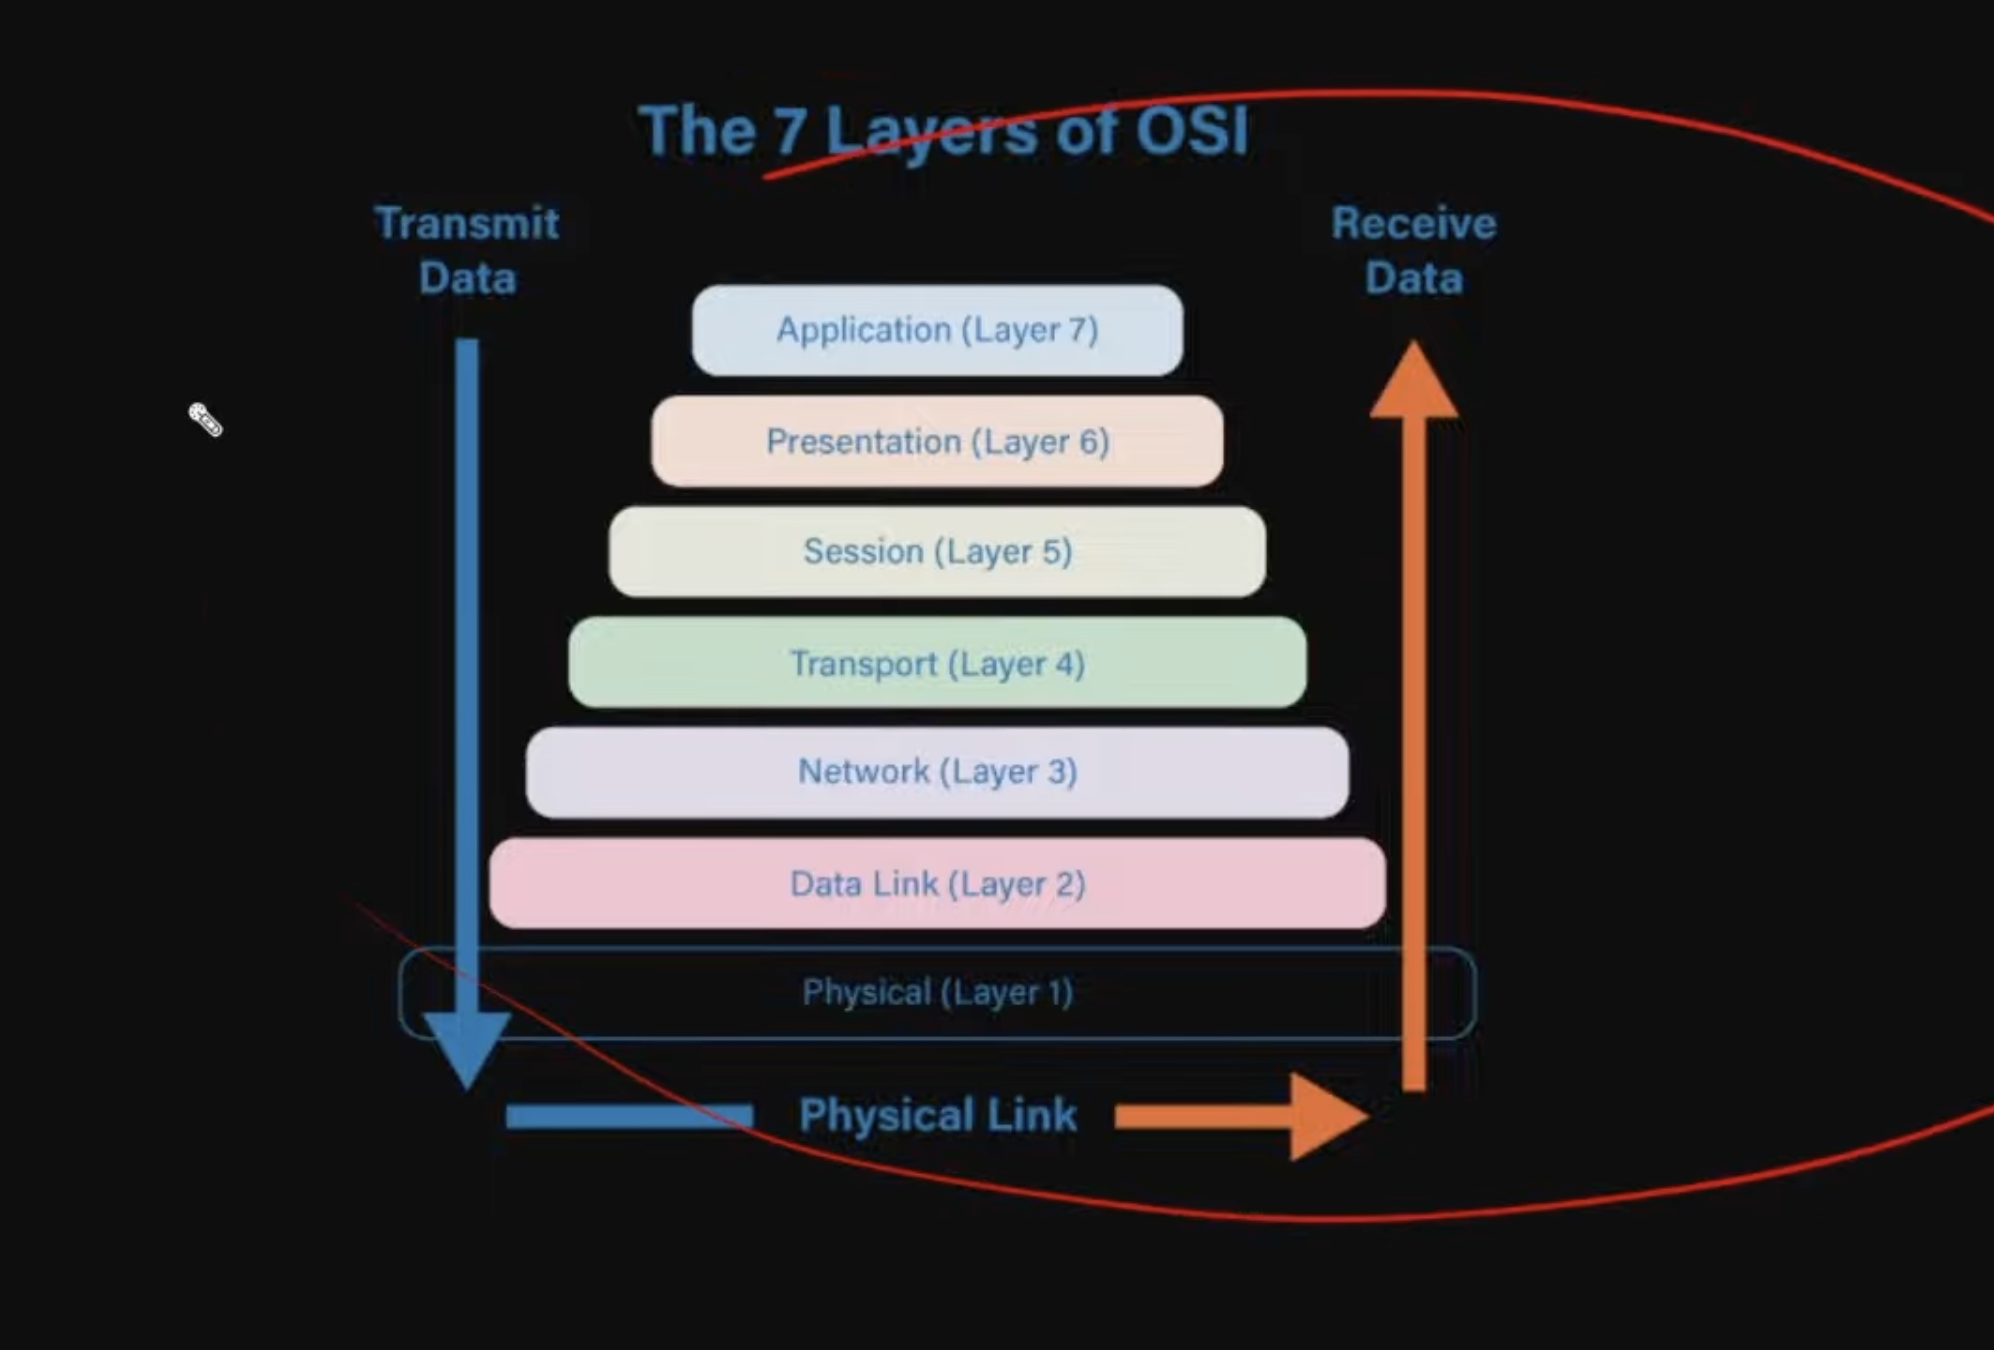

# backend engineers deal with application layer mostly

Correct, but incomplete.

Backend engineers primarily work at the application layer (HTTP, WebSockets, gRPC, your actual API logic). That's where your routes, business logic, authentication, and database queries live.

But backend engineers also deal with:

**Transport layer (TCP/UDP):**
When you configure connection timeouts, keep-alive settings, or debug why connections are dropping.

**Database layer:**
Connection pooling, query optimization, transactions, replication.

**Infrastructure layer:**
Nginx configuration, load balancers, firewalls, security groups, DNS records.

**Caching layer:**
Redis, Memcached, CDN configuration.

**Message queues:**
Kafka, RabbitMQ, SQS for async processing.

So yes, application layer is the primary focus. But a backend engineer who only knows application layer is a weak backend engineer. You will inevitably touch networking, infrastructure, and data layers.

The deeper you go in your career:

Junior: mostly application layer, write API endpoints

Mid: application + database optimization + caching

Senior: all of the above + infrastructure + networking debugging + system design

What else do you have on HTTP?

# but mostly we'll foncus on application layer as of now

# HTTP Messages(request/response messages)

![Screenshot 2025-12-08 at 1.40.16 AM.png](<attachment:Screenshot 2025-12-08 at 1.40.16 AM.png>)
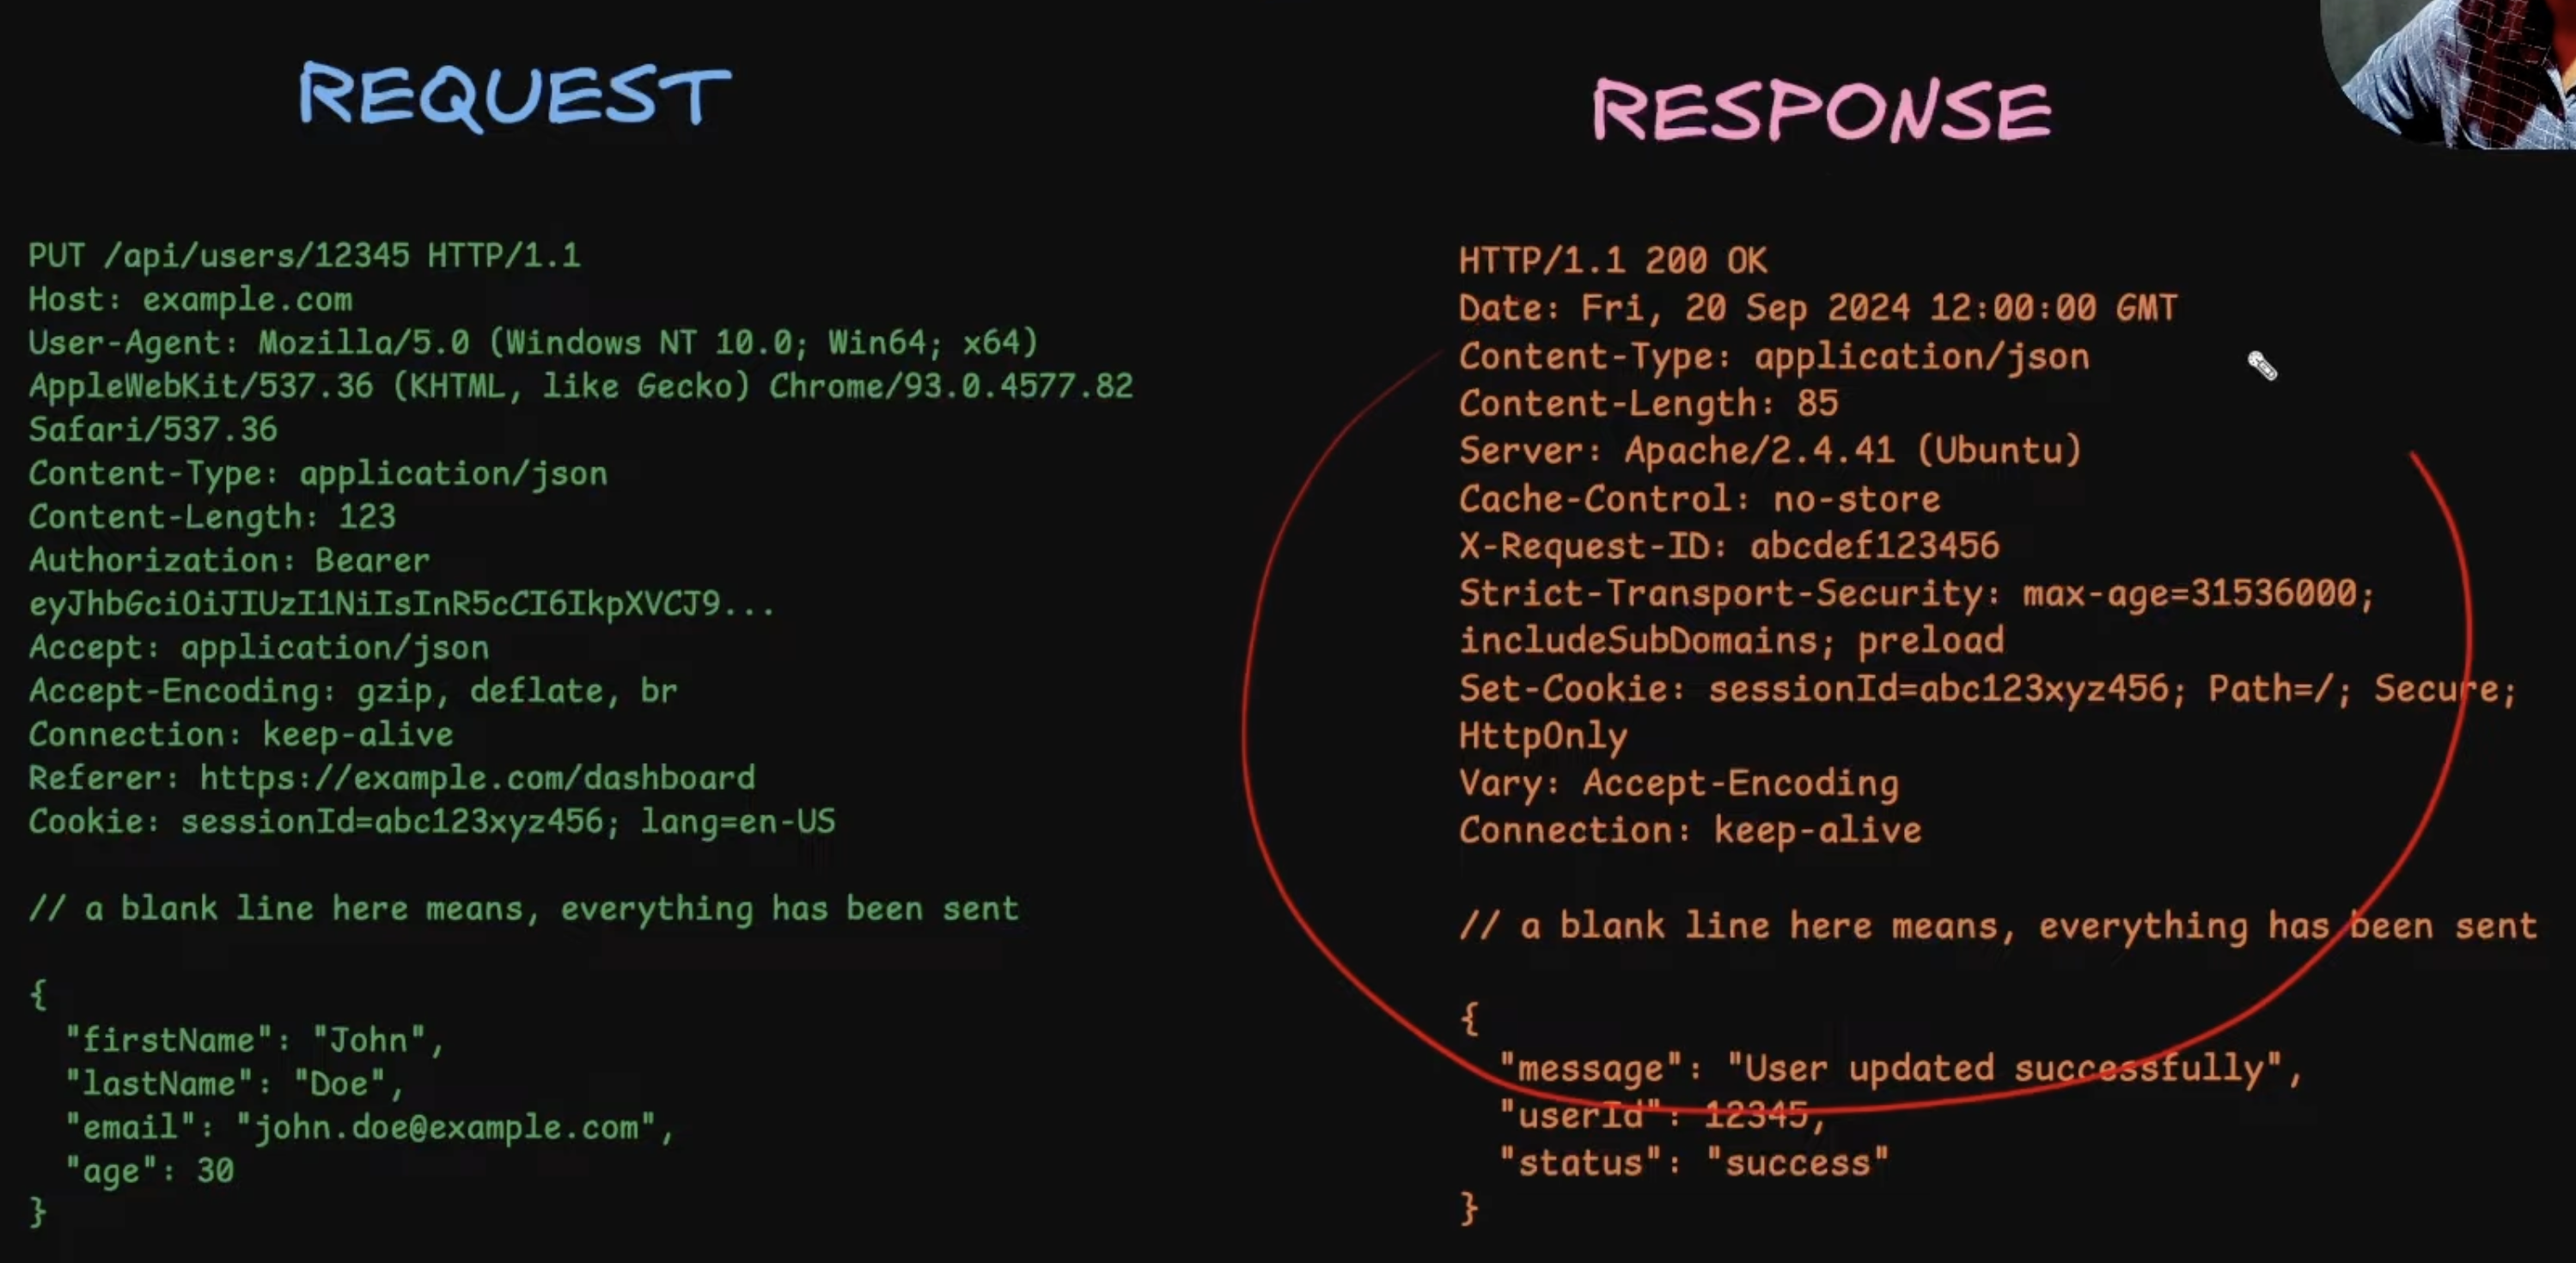

### REQUEST
#### PUT is request method
#### /api/users/12345  that is resources url, one we are requesting from server
#### HTTP/1.1 is HTTP version (currently most used)
#### HOST: example.com (which is our domains)

#### and all these things are called headers 
![Screenshot 2025-12-08 at 1.43.47 AM.png](<attachment:Screenshot 2025-12-08 at 1.43.47 AM.png>)


## after blank line, request body starts
![Screenshot 2025-12-08 at 1.44.59 AM.png](<attachment:Screenshot 2025-12-08 at 1.44.59 AM.png>)
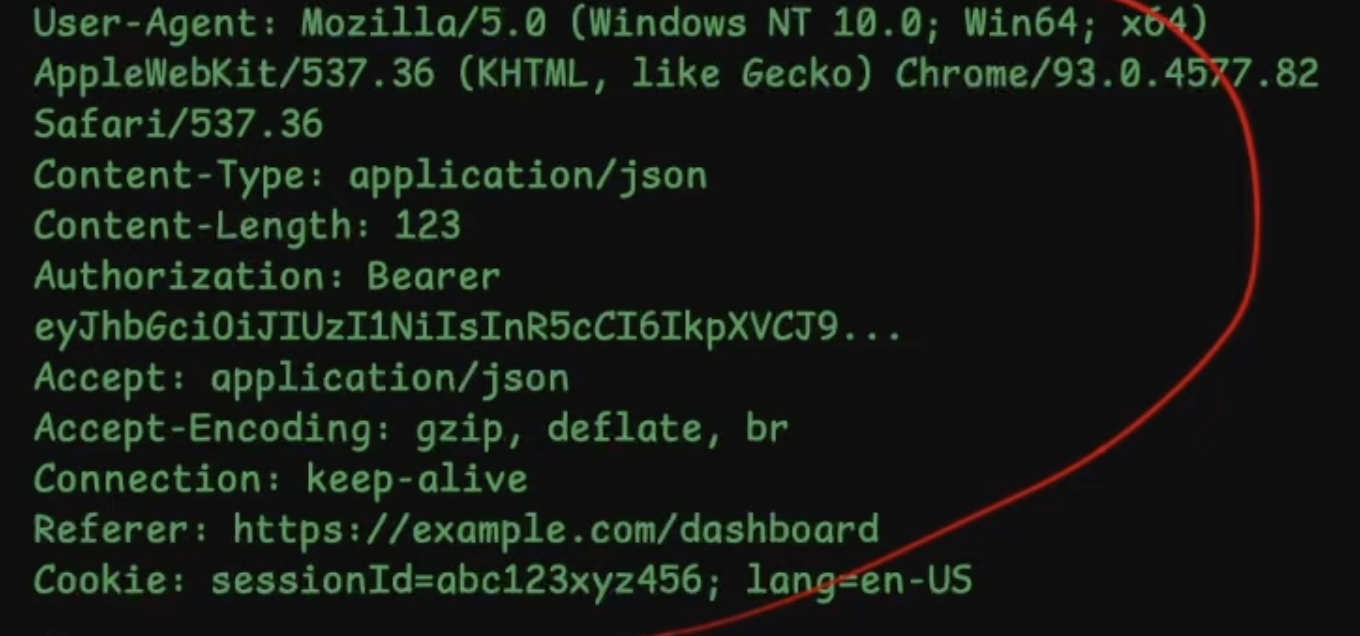
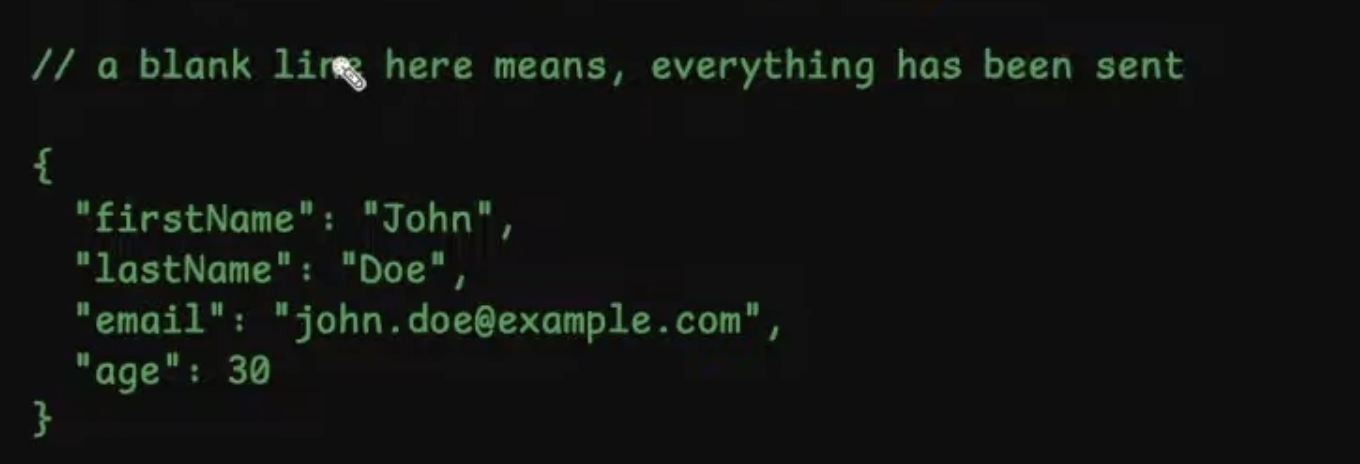

# for response 
#### HTTP/1.1  https version
#### 200 OK (status code )


and then there are headers, 
![Screenshot 2025-12-08 at 1.46.51 AM.png](<attachment:Screenshot 2025-12-08 at 1.46.51 AM.png>)

anf after blank line there is response body

![Screenshot 2025-12-08 at 1.47.39 AM.png](<attachment:Screenshot 2025-12-08 at 1.47.39 AM.png>)
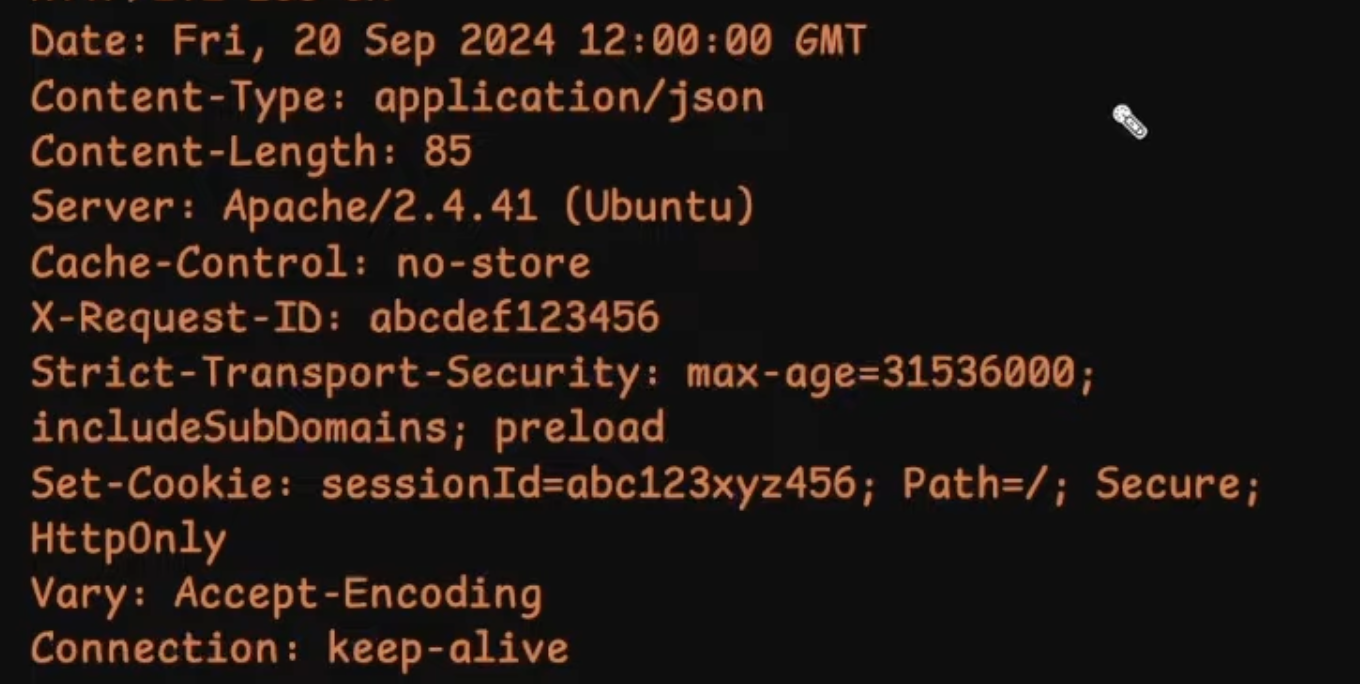
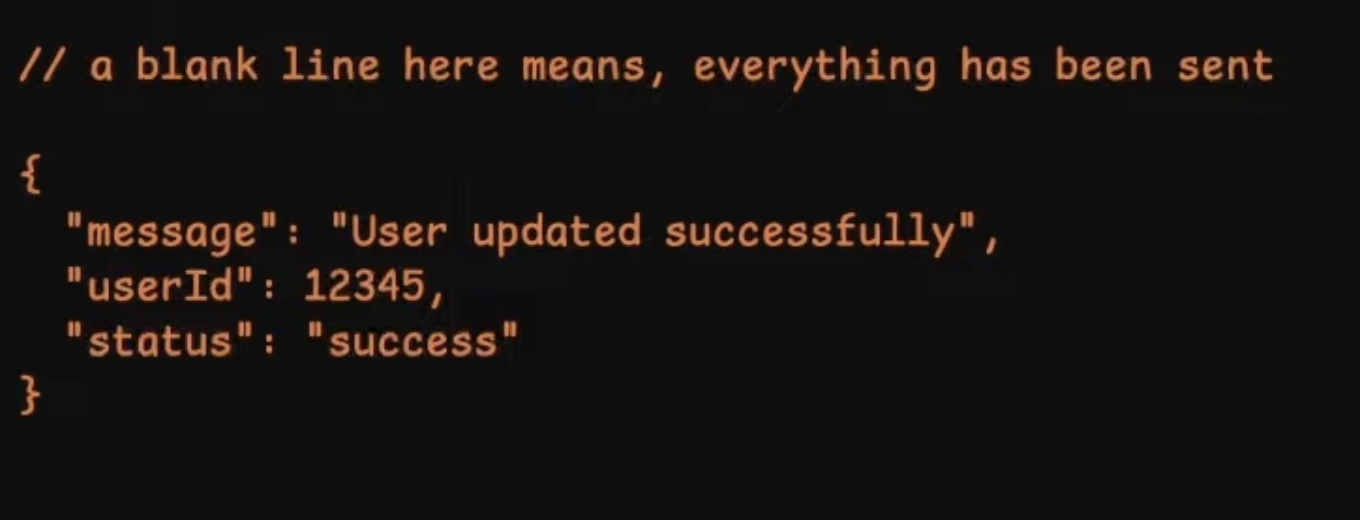

Okay — let’s go **technically precise**. HTTP messages are the **units of communication** between client and server in the HTTP protocol. There are **two types**: **requests** and **responses**.

---

## 1️⃣ HTTP Request Message

**Purpose:** Sent by the **client** to ask the server to perform an action.

**Structure (technical):**

```
Request Line
Headers
[Optional Body]
```

### Example:

```
GET /profile HTTP/1.1
Host: api.example.com
Authorization: Bearer <token>
Accept: application/json

```

**Explanation:**

1. **Request Line:**

   * Method (`GET`, `POST`, `PUT`, `DELETE`)
   * URL or path (`/profile`)
   * HTTP version (`HTTP/1.1`)

2. **Headers:**

   * Key-value pairs with meta-information
   * Examples: `Host`, `Authorization`, `Content-Type`, `Accept`

3. **Body (Optional):**

   * Present in `POST`, `PUT`, etc.
   * Contains data being sent (JSON, form data, etc.)

---

## 2️⃣ HTTP Response Message

**Purpose:** Sent by the **server** to answer the client’s request.

**Structure (technical):**

```
Status Line
Headers
[Optional Body]
```

### Example:

```
HTTP/1.1 200 OK
Content-Type: application/json
Content-Length: 48

{"id":123,"name":"Alice","email":"alice@example.com"}
```

**Explanation:**

1. **Status Line:**

   * HTTP version (`HTTP/1.1`)
   * Status code (`200`, `404`, `500`)
   * Reason phrase (`OK`, `Not Found`, `Internal Server Error`)

2. **Headers:**

   * Key-value metadata: `Content-Type`, `Set-Cookie`, `Cache-Control`

3. **Body (Optional):**

   * Actual content: HTML, JSON, images, etc.

---

## 3️⃣ Key Points About HTTP Messages

* **Text-based protocol** (human-readable)
* Request → server, response → client
* Headers **carry metadata**, body **carries content**
* Each request-response pair is **independent in stateless HTTP**

---

### ✅ Mental Model

```
Client (Browser)               Server (Backend)
   |                               |
   | -- HTTP Request ------------> |
   |                               |
   | <--- HTTP Response ---------  |
```

> Think of HTTP messages as **letters**:
>
> * Request = letter from client asking for something
> * Response = server’s reply

---

If you want, I can **break down a real HTTP request/response from your browser dev tools** and explain **every header and field**, so you can see this in practice. Do you want me to do that?


HTTP messages come in two types: requests and responses. Same structure, different purpose.

**Request (client to server):**

```
POST /api/users HTTP/1.1
Host: example.com
Content-Type: application/json
Authorization: Bearer abc123

{"name": "zohaib", "email": "z@example.com"}
```

Four parts:

1. **Request line:** method (POST), path (/api/users), HTTP version
2. **Headers:** metadata (key value pairs, one per line)
3. **Empty line:** separates headers from body
4. **Body:** the actual data (optional, not all requests have it)

**Response (server to client):**

```
HTTP/1.1 201 Created
Content-Type: application/json
Set-Cookie: session=xyz

{"id": 1, "name": "zohaib"}
```

Four parts:

1. **Status line:** HTTP version, status code (201), status text (Created)
2. **Headers:** metadata from server
3. **Empty line:** separates headers from body
4. **Body:** the actual response data

**Key points:**

GET requests usually have no body. You're just asking for data.

POST, PUT, PATCH requests usually have a body. You're sending data.

Responses almost always have a body, unless it's something like 204 No Content.

Headers describe the message: what format is the body, how big is it, authentication info, caching rules, cookies.

The body is the actual payload. JSON, HTML, file bytes, whatever.

What specifically do you want to go deeper on? Methods? Status codes? Specific headers?

Got it — let’s break down **HTTP messages clearly**, focusing on **request vs response** and what **body** means in each context.

---

## 1️⃣ HTTP Request Message

An **HTTP request** is what the client sends to the server to ask it to do something.

**Structure:**

```
Request Line
Headers
[Optional Body]
```

### Example:

```
POST /login HTTP/1.1
Host: api.example.com
Content-Type: application/json
Authorization: Bearer <token>

{
  "username": "alice",
  "password": "12345"
}
```

**Explanation:**

1. **Request Line:**

   * `POST` → HTTP method (what action to perform)
   * `/login` → endpoint/path
   * `HTTP/1.1` → HTTP version

2. **Headers:**

   * Key-value pairs with meta-information
   * Examples:

     * `Content-Type` → type of data in body (`application/json`)
     * `Authorization` → token for authentication

3. **Request Body (Optional):**

   * Contains **data sent to the server**
   * Present in methods like `POST` or `PUT`
   * Example here: JSON with username and password

> **Key:** GET requests usually **don’t have a body**; data is sent in the URL/query parameters.

---

## 2️⃣ HTTP Response Message

An **HTTP response** is what the server sends back to the client after processing the request.

**Structure:**

```
Status Line
Headers
[Optional Body]
```

### Example:

```
HTTP/1.1 200 OK
Content-Type: application/json
Content-Length: 53

{
  "id": 123,
  "name": "Alice",
  "token": "abcdef123456"
}
```

**Explanation:**

1. **Status Line:**

   * `HTTP/1.1` → HTTP version
   * `200` → status code (success)
   * `OK` → reason phrase

2. **Headers:**

   * Metadata about the response
   * Examples:

     * `Content-Type` → type of data in body
     * `Set-Cookie` → send cookies to client

3. **Response Body (Optional):**

   * The **actual content/data** returned to the client
   * Could be JSON, HTML, XML, images, etc.

> **Key:** Some responses like `204 No Content` **do not have a body**.

---

## 3️⃣ Quick Comparison: Request vs Response Body

| Feature      | Request Body               | Response Body                    |
| ------------ | -------------------------- | -------------------------------- |
| Who sends it | Client                     | Server                           |
| Purpose      | Send data to server        | Send data/content back to client |
| Optional?    | Yes (POST/PUT usually)     | Yes (depends on status code)     |
| Format       | JSON, form data, XML, etc. | JSON, HTML, XML, images, etc.    |

---

### 💡 Mental Model

Think of **HTTP messages as letters**:

* Request = letter **from you to the server** asking it to do something (body = instructions/data)
* Response = letter **from server to you** with the answer (body = data/content)

---

If you want, I can next **draw a visual showing request and response with headers + body flow**, so you can literally see “where body fits in the HTTP message.”

Do you want me to do that?
